# KNN 

In [38]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Charger les données
data = pd.read_csv('diabetes.csv')

data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<b>On commence avec un K = 5 </b>

In [40]:
# Séparer les features et la variable cible
X = data.drop(columns=["Diabetes_012"])
y = data["Diabetes_012"]

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir le modèle KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 83.02%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42795
         1.0       0.03      0.00      0.00       944
         2.0       0.39      0.21      0.27      6997

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.39     50736
weighted avg       0.78      0.83      0.80     50736



<b>Le modèle fonctionne bien sur la classe 0.0 mais rencontre des difficultés avec les classes minoritaires 1.0 et 2.0.</b>

<b>On va a essayer une technique de validation croisée pour déterminer quelle valeur de K offre les meilleures performances.<b>

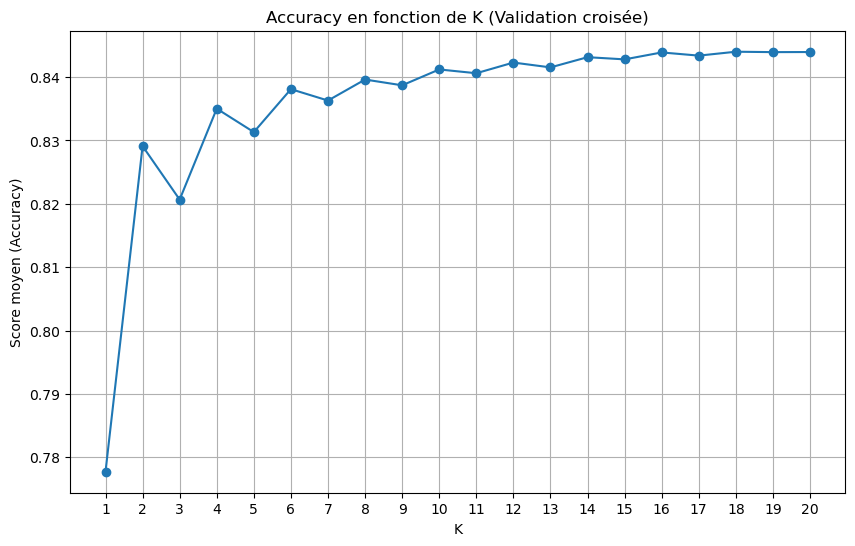

Le meilleur K est 18 avec une accuracy moyenne de 0.84


In [41]:
# Tester différentes valeurs de K
k_values = range(1, 21)  # Plage de valeurs pour K
mean_scores = []

# Boucle sur différentes valeurs de K : le modèle est évalué pour chaque valeur de 
# K entre 1 et 20 en utilisant une validation croisée à 5 plis (cv=5).
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Visualiser les scores en fonction de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('Accuracy en fonction de K (Validation croisée)')
plt.xlabel('K')
plt.ylabel('Score moyen (Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Meilleur K
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f"Le meilleur K est {best_k} avec une accuracy moyenne de {max(mean_scores):.2f}")


<b> On valide la performance avec une K equal à 18.</b>

In [42]:
# Entraîner le modèle KNN avec K=18
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='minkowski', p=1.5)
knn.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Calculer l'accuracy et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 83.98%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.45      0.17      0.25      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.38      0.39     50736
weighted avg       0.79      0.84      0.80     50736



<p>Classe 0.0 (majoritaire) : Le modèle fonctionne bien, avec un F1-score élevé.</p>
<p>Classes 1.0 et 2.0 (minoritaires) : Les performances restent faibles, particulièrement pour la classe 1.0 où le rappel est très bas. Le modèle a du mal à prédire correctement ces classes en raison du déséquilibre.</p>

In [29]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour rééquilibrer les classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle KNN avec K=18
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train_scaled, y_train_res)

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Calculer l'accuracy et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Accuracy: 69.90%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.82     42795
         1.0       0.03      0.18      0.05       944
         2.0       0.32      0.48      0.39      6997

    accuracy                           0.70     50736
   macro avg       0.42      0.47      0.42     50736
weighted avg       0.82      0.70      0.75     50736



<b>Rééchantillonnage manuel (suréchantillonnage de la classe minoritaire) </b>

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Charger les données et séparer les variables
file_path = 'diabetes.csv'
data = pd.read_csv(file_path)

# Séparer les features et la variable cible
X = data.drop(columns=["Diabetes_012"])  # Features
y = data["Diabetes_012"]  # Target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rééchantillonnage manuel : Suréchantillonner la classe minoritaire (classe 1)
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
class_2 = X_train[y_train == 2]

# Dupliquer la classe 1 pour équilibrer les données
X_train_resampled = pd.concat([class_0, class_1.sample(len(class_0) * 2, replace=True), class_2])
y_train_resampled = pd.concat([y_train[y_train == 0], y_train[y_train == 1].sample(len(class_0) * 2, replace=True), y_train[y_train == 2]])

# Normaliser les données après rééchantillonnage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle KNN avec K=3
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
knn.fit(X_train_scaled, y_train_resampled)

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Calculer l'accuracy et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 79.56%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     42795
         1.0       0.04      0.06      0.04       944
         2.0       0.35      0.25      0.29      6997

    accuracy                           0.80     50736
   macro avg       0.42      0.40      0.41     50736
weighted avg       0.79      0.80      0.79     50736



In [37]:
from imblearn.over_sampling import SMOTE

# Rééchantillonnage manuel : Suréchantillonner la classe minoritaire (classe 1)
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
class_2 = X_train[y_train == 2]

# Appliquer SMOTE uniquement à la classe 1
smote = SMOTE(sampling_strategy={1: len(class_0)}, random_state=42)  # Générer des exemples pour atteindre le nombre d'instances de la classe majoritaire
X_train_smote, y_train_smote = smote.fit_resample(class_1, y_train[y_train == 1])

# Combiner les classes 0, 1 (après SMOTE) et 2
X_train_resampled = pd.concat([class_0, pd.DataFrame(X_train_smote, columns=X.columns), class_2])
y_train_resampled = pd.concat([y_train[y_train == 0], y_train_smote, y_train[y_train == 2]])

# Normaliser les données après rééchantillonnage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle KNN avec K=18
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='manhattan')
knn.fit(X_train_scaled, y_train_resampled)

# Prédire sur l'ensemble de test
y_pred = knn.predict(X_test_scaled)

# Calculer l'accuracy et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead